# TD 5 - 03/04/20 - Simulation et Monte Carlo

- **Exercice 9 :** Cross-Entropy Method
- **Exercice 5, question falcutative :** Control variates, variables antithétiques, **QMC**
- **Option :** petit bilan du module Simulation et Monte Carlo

# Informations

- pas de soutenance la semaine prochaine mais soutenance le **24/04/20**
- les anciens élèves de Mme Caroline Petit : soutenance devant Mr Nicolas Chopin
- tous les corrigés *à jour* se trouvent sur **Teams**

# Exercice 9 : Cross-Entropy Method

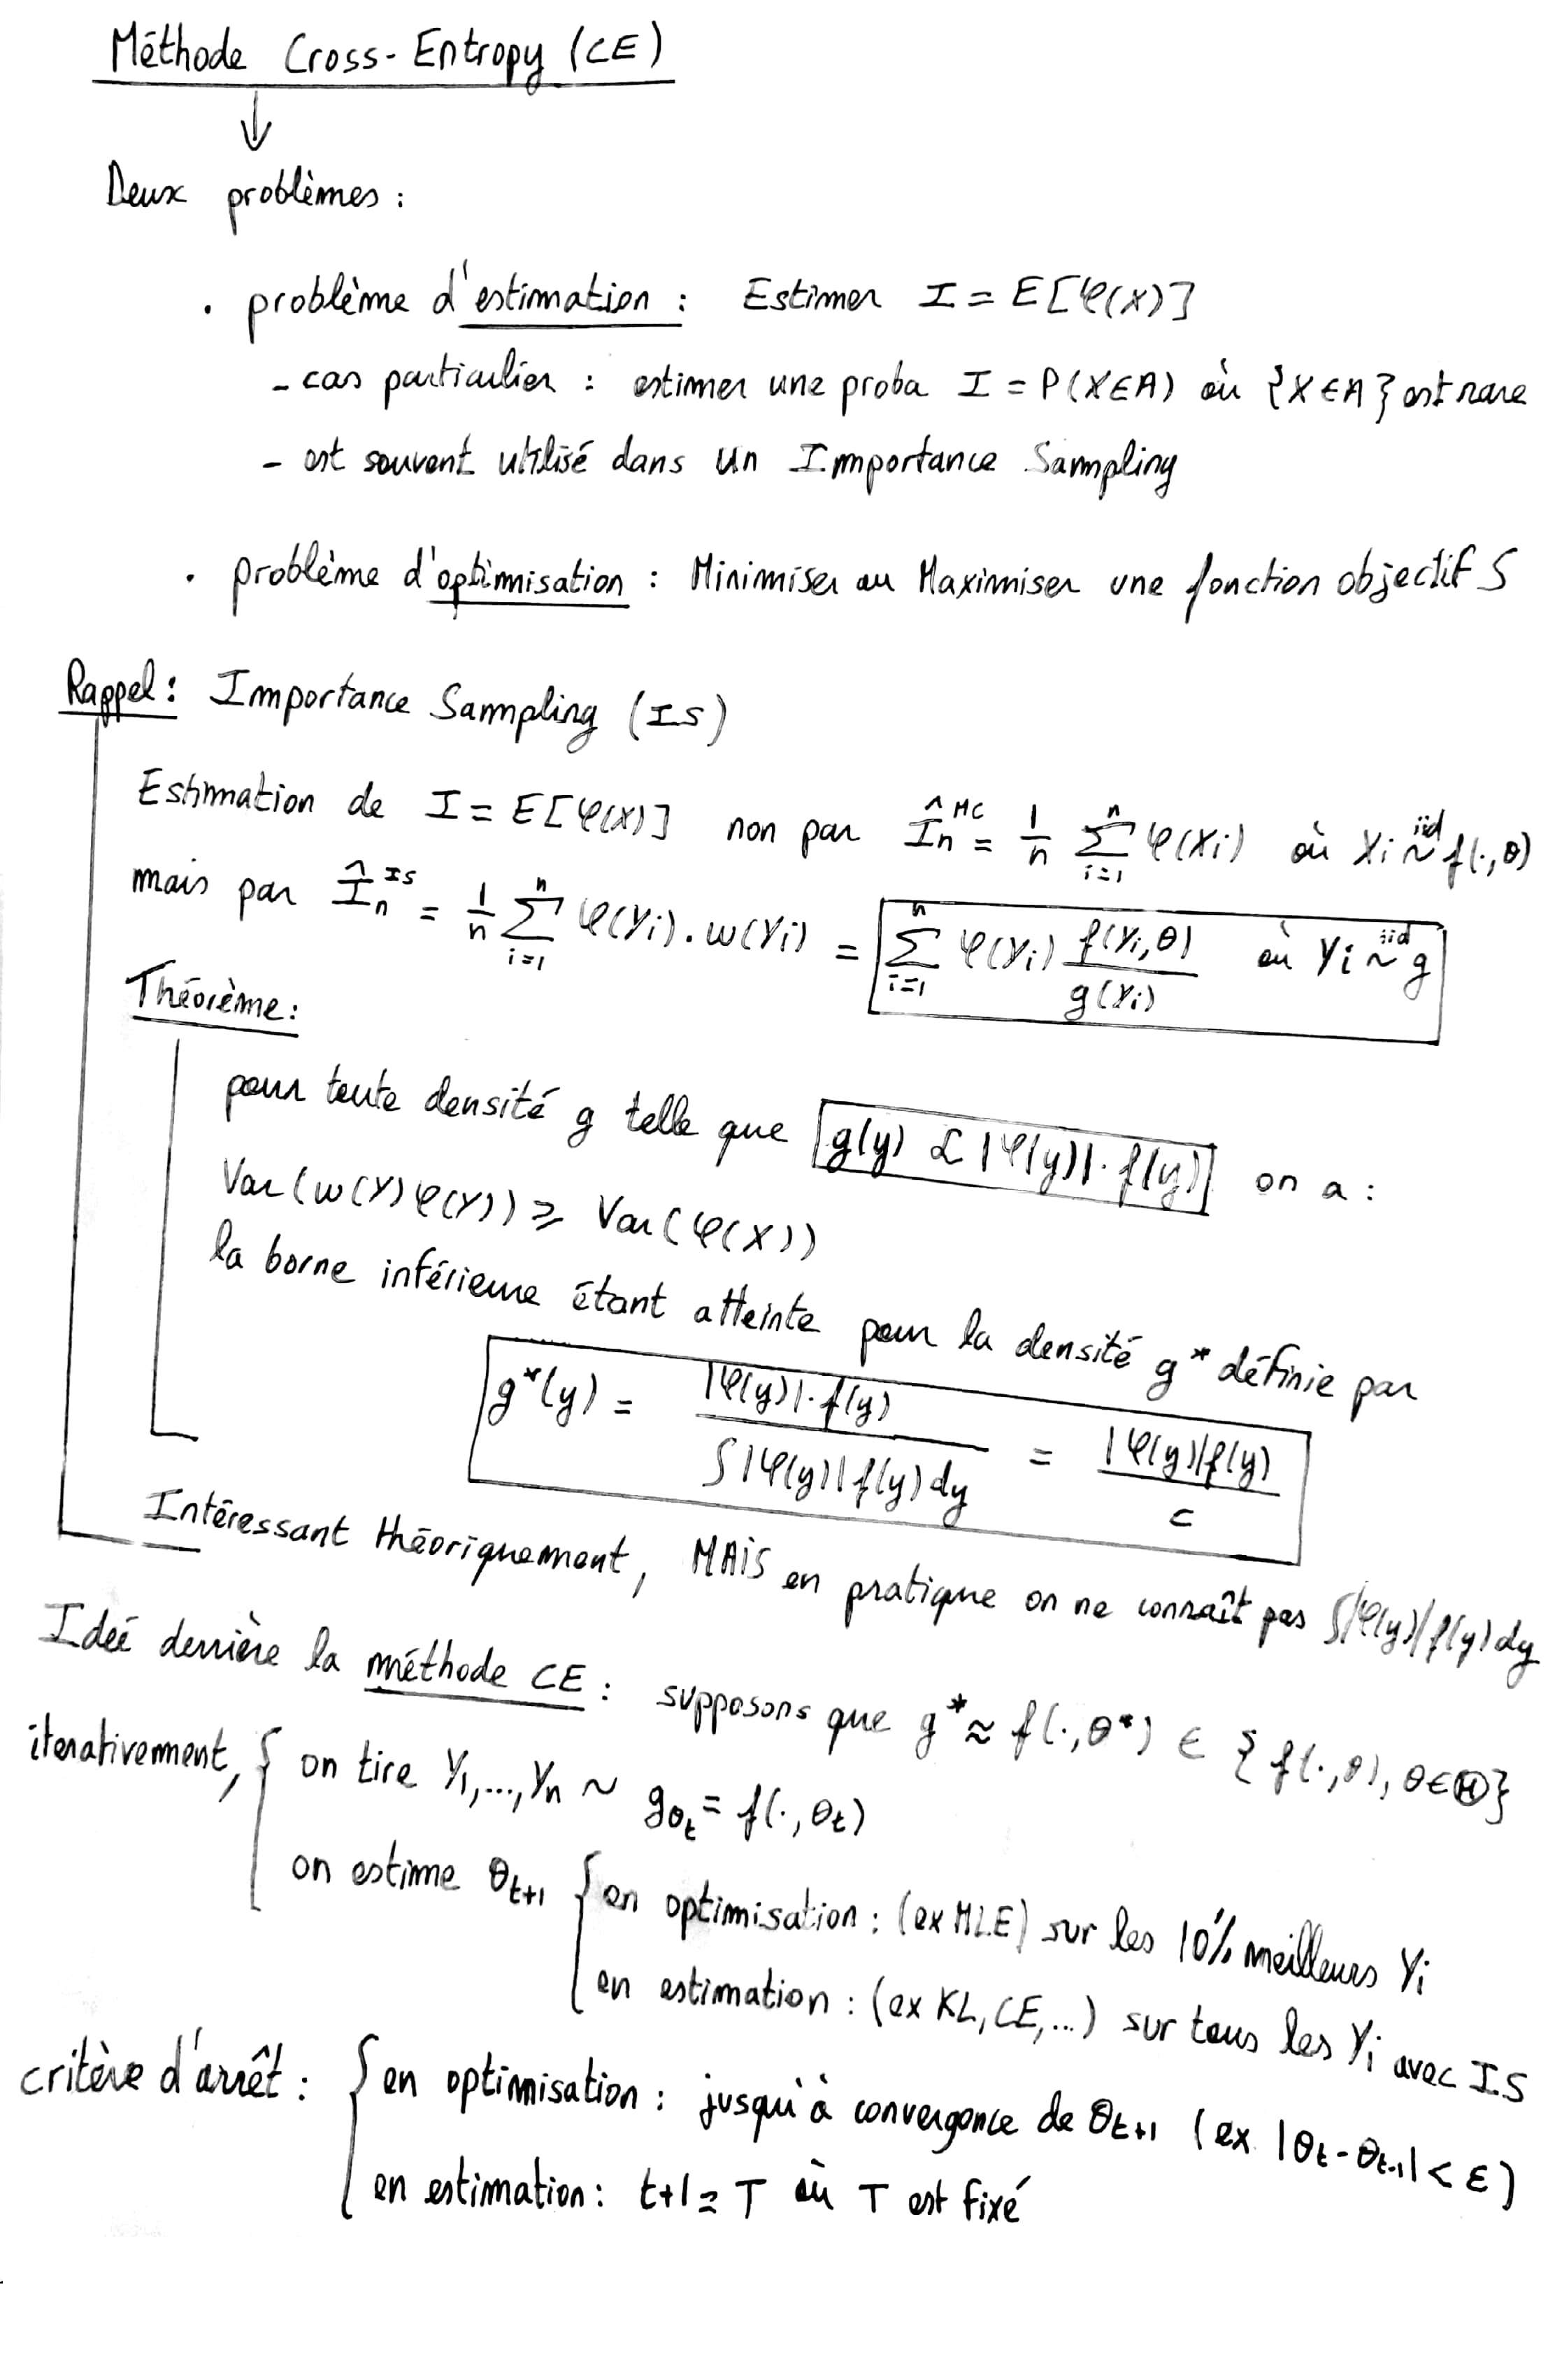

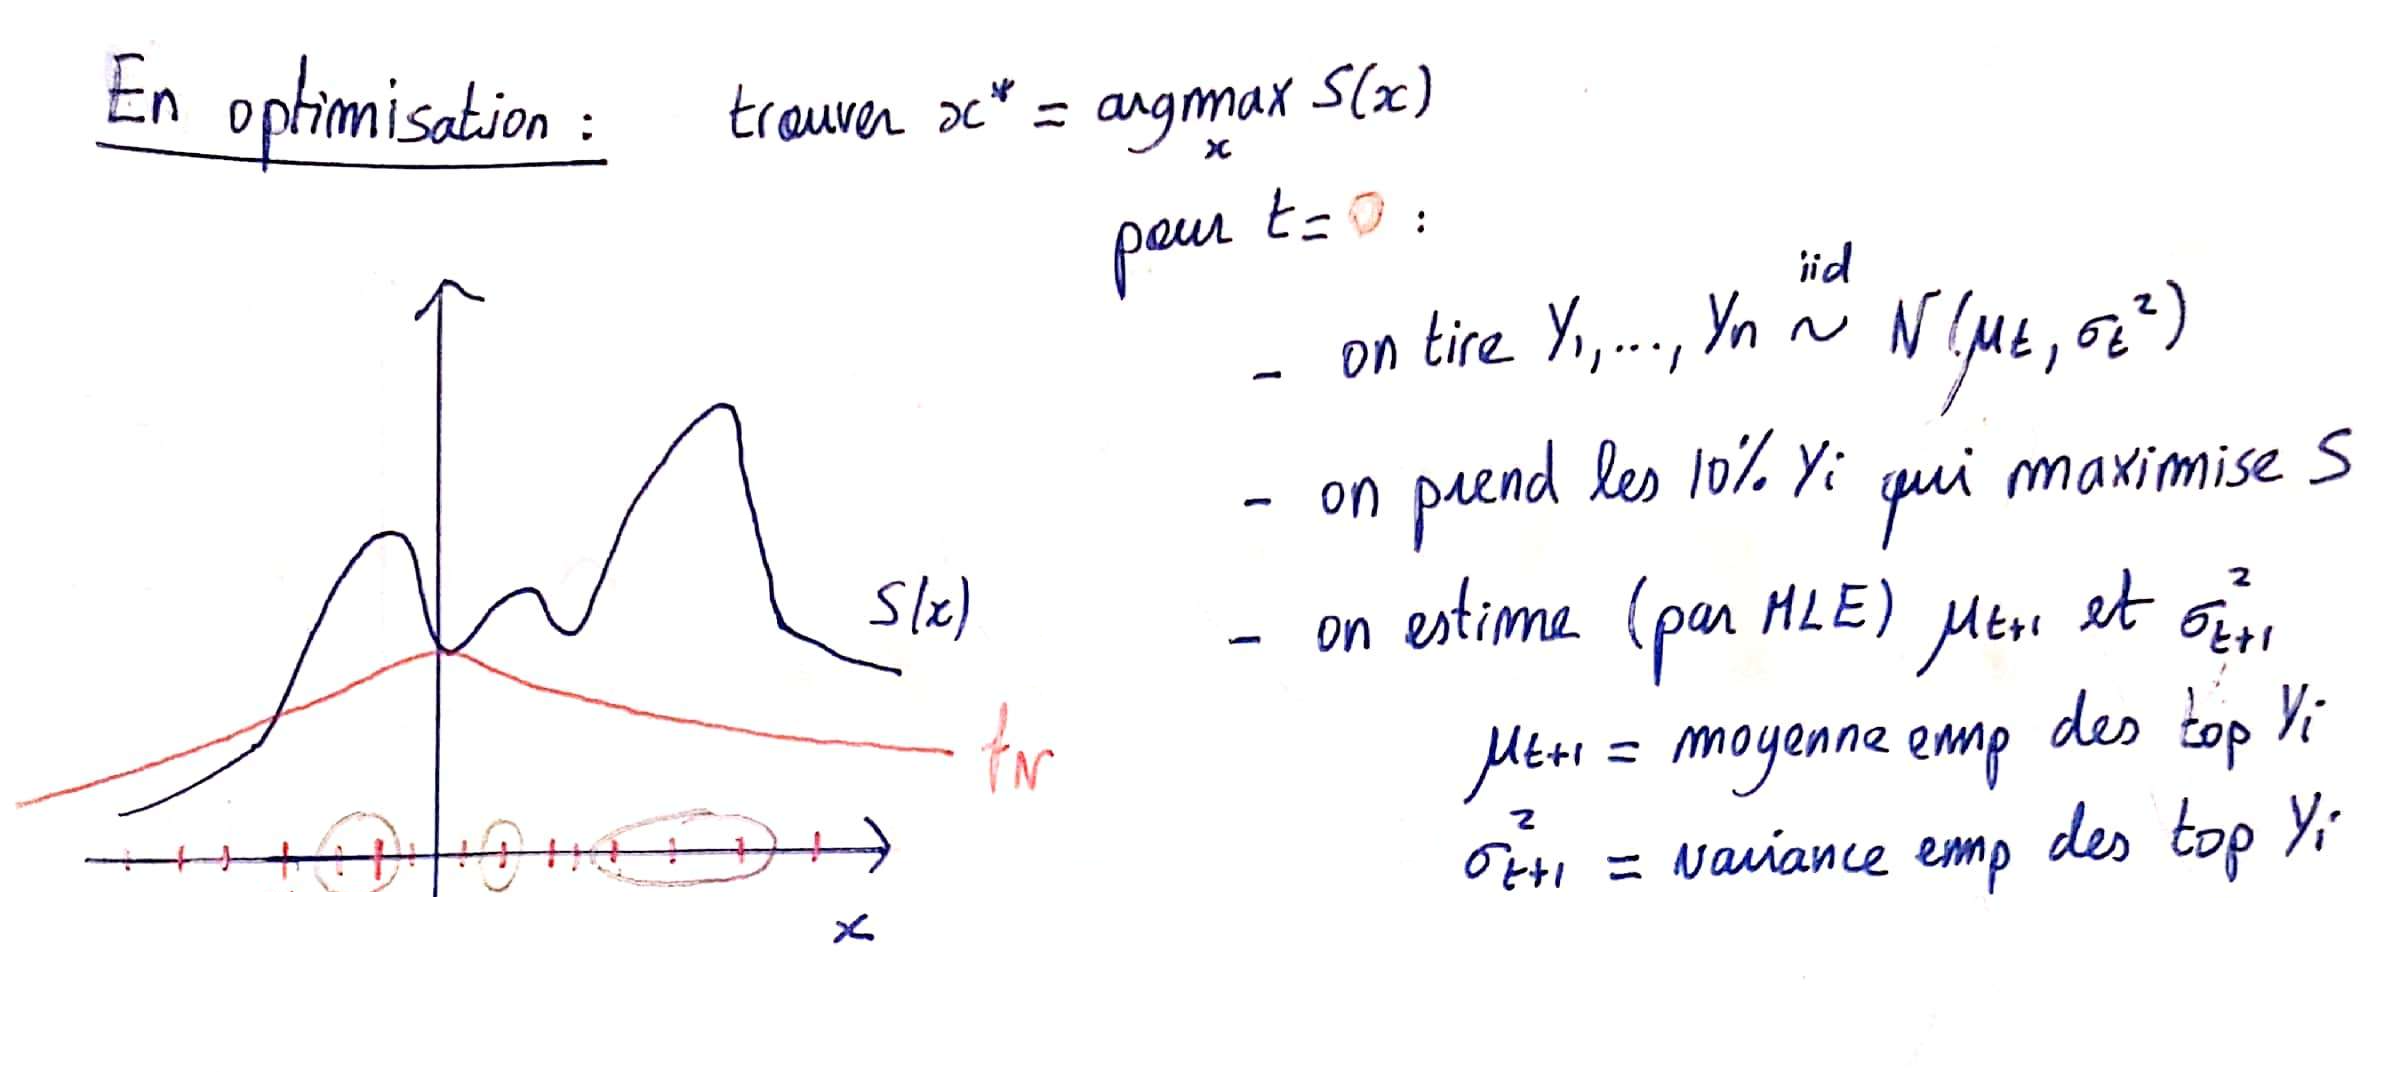

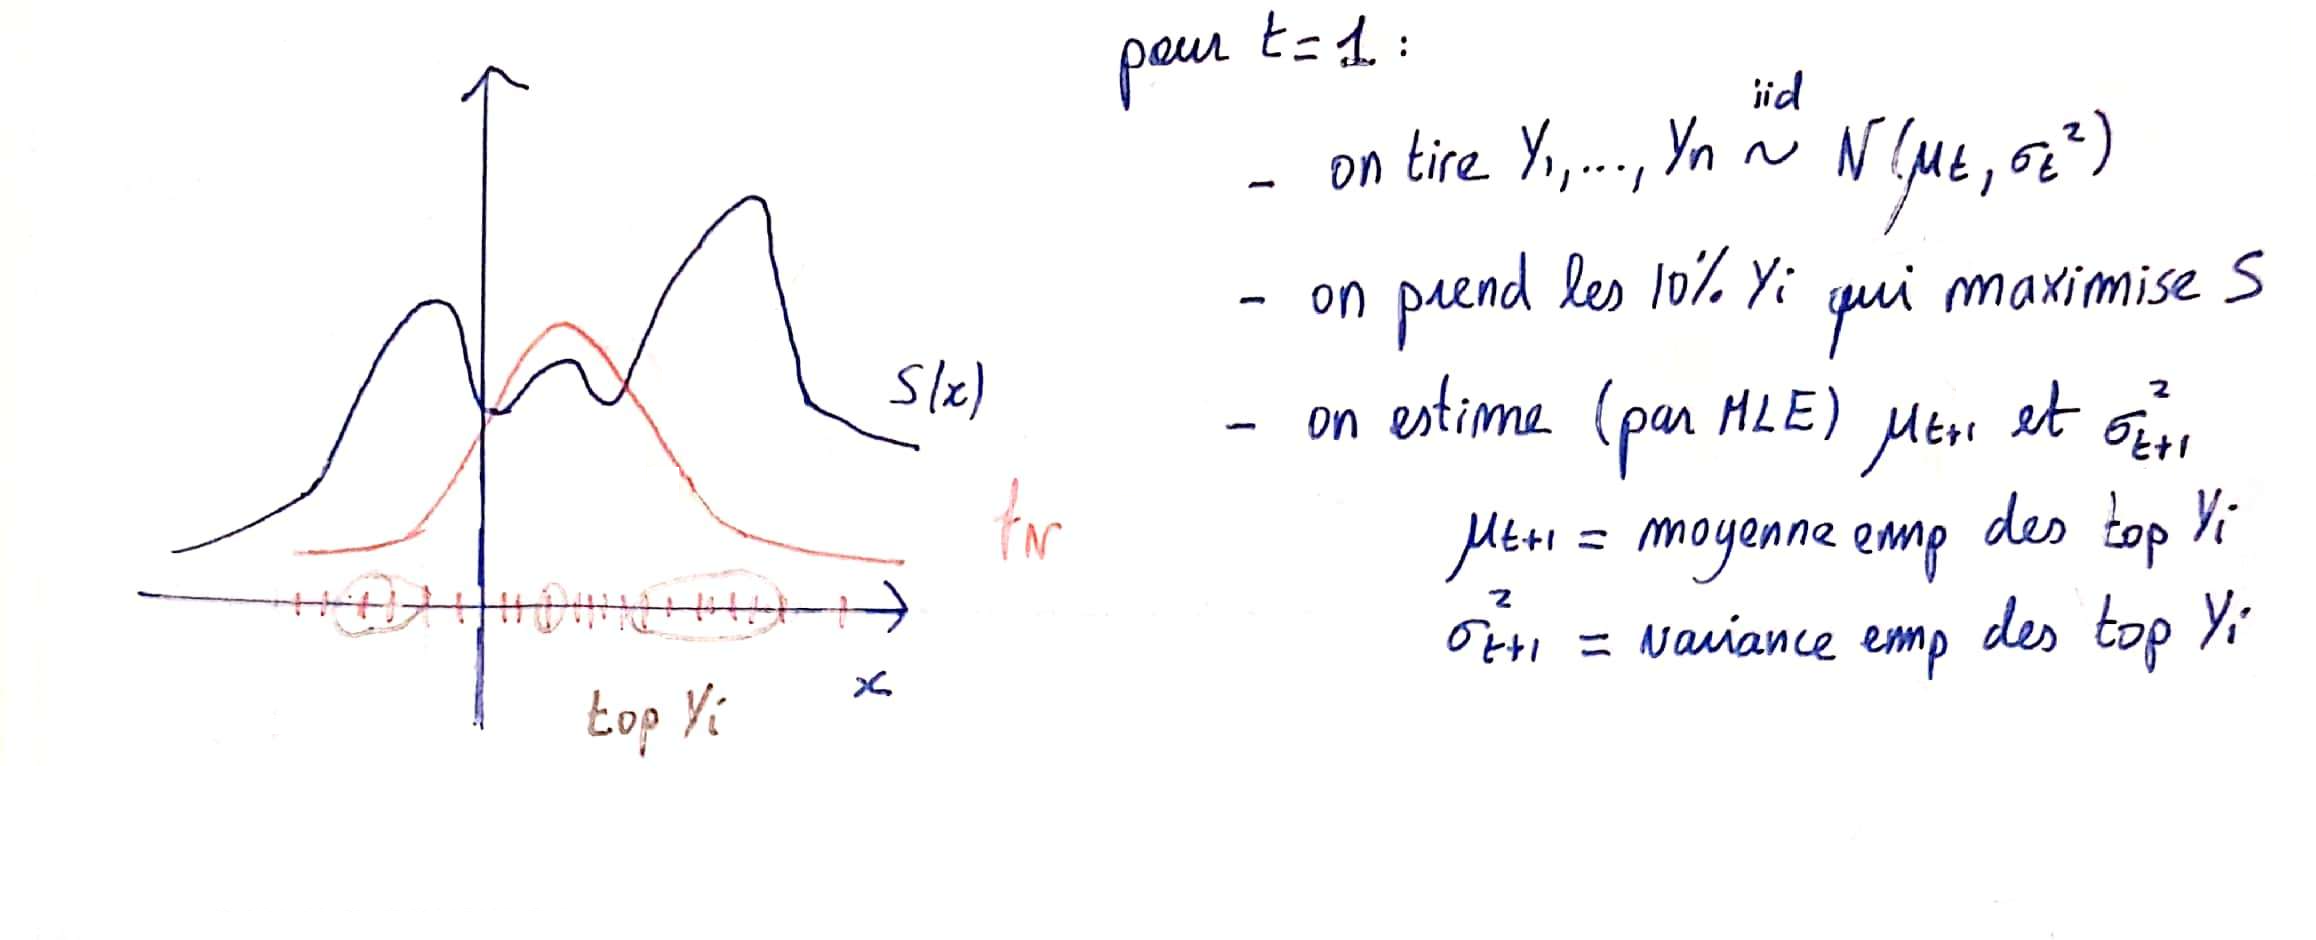

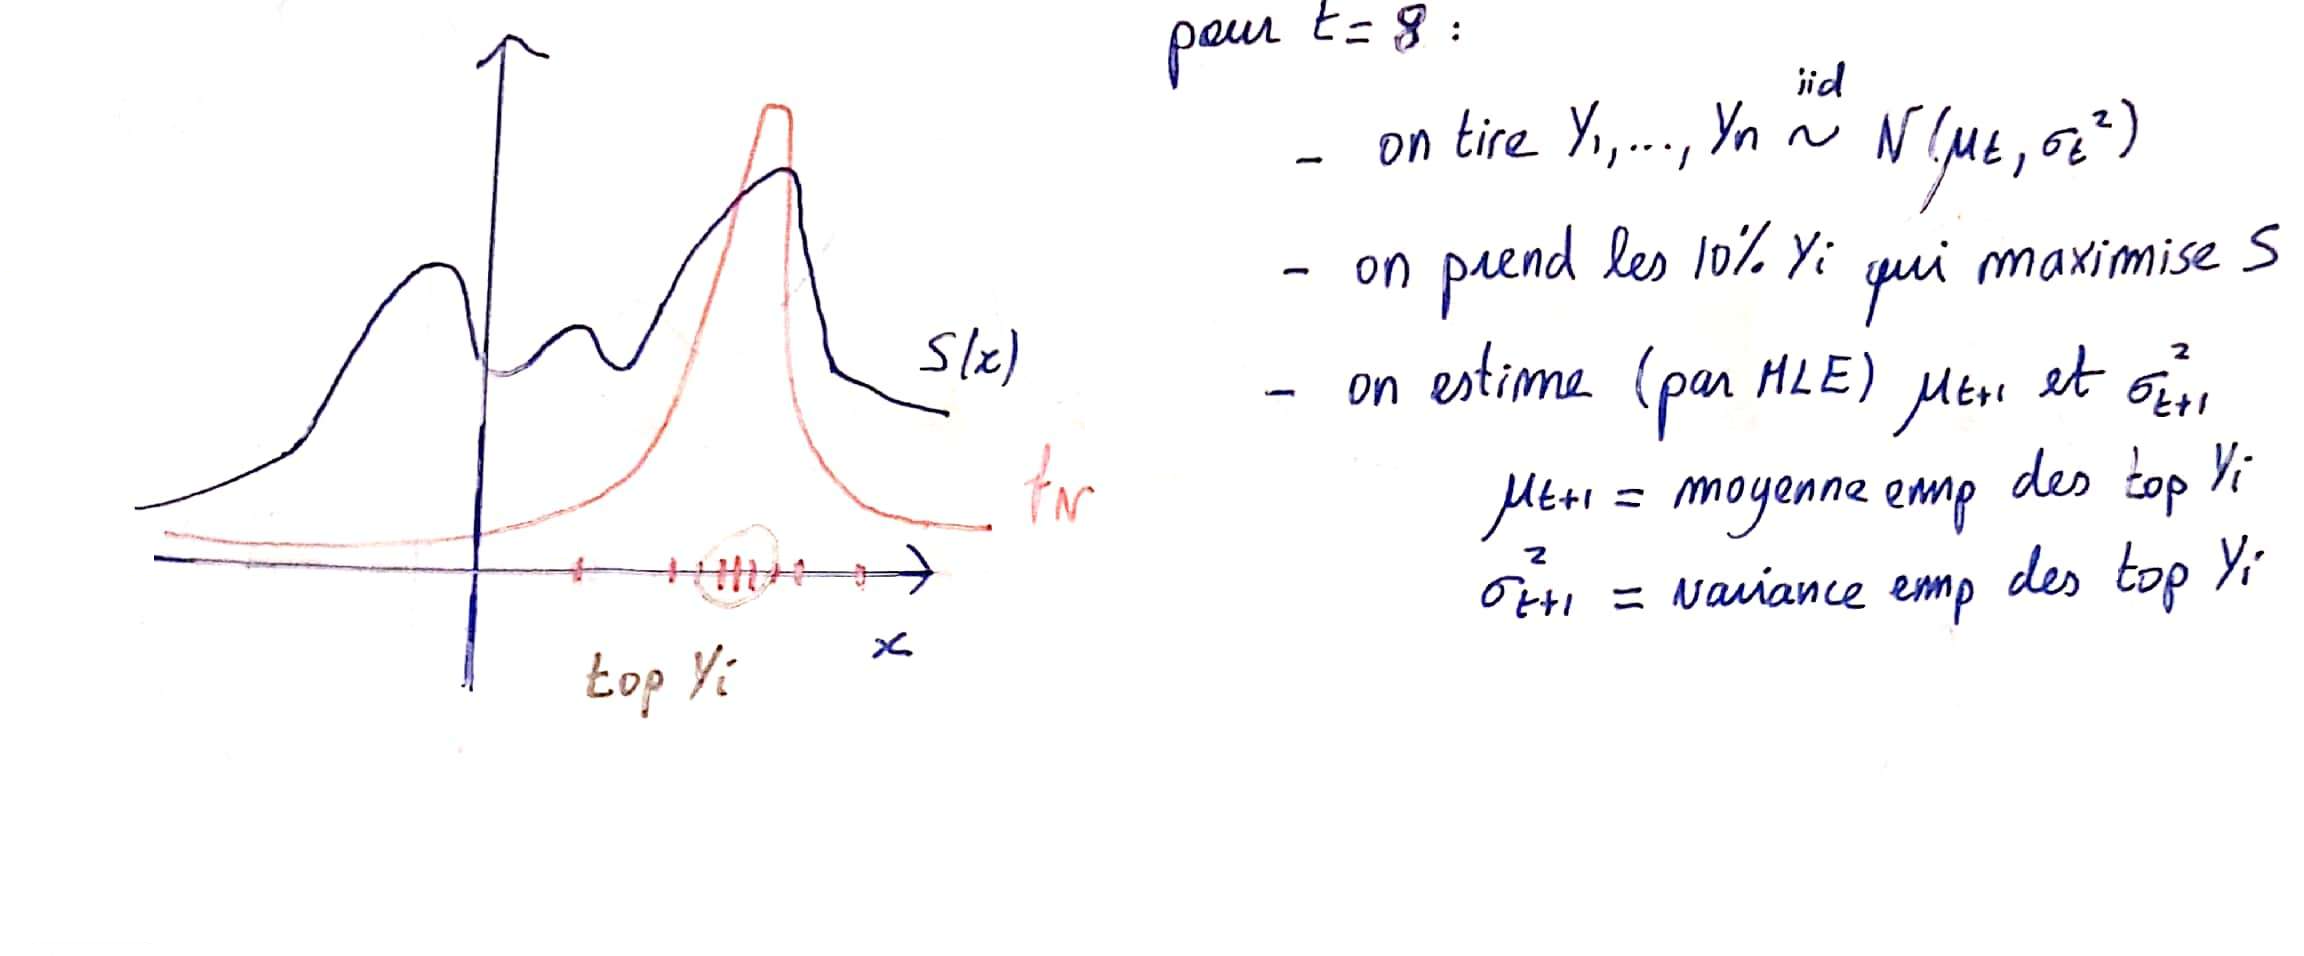

Soit $S(x) = \sum\limits_{i=1}^d 100 (x_{i+1}-x_i)^2 + (x_i - 1)^2$ la fonction de [Rosenbrock](https://en.wikipedia.org/wiki/Rosenbrock_function)

- Proposons un algorithme de type CE pour obtenir le minimum global d'une fonction quelconque $S : \mathbb{R}^d \to \mathbb{R}$

- l'appliquons à la fonction de Rosenbrock, pour différentes valeurs de $d$

**code R :**

In [7]:
library("mvtnorm") # pour générer des lois normales

rosenbrock <- function(x){
  y = 0
  for (i in (1:(length(x)-1))){
    y = y + 100*(x[i+1]-x[i])^2+(x[i]-1)^2
  }
  return(y)
}

optCE <- function(fun = rosenbrock, n = 1000, d = 3, eps = 1e-16, max_iter = 1000){
    # fun, la fonction objectif
    # n, la taille de l'échantillon
    # d, la dimension de x
    # eps, le critère d'arrêt
    # max_iter, 
    
    # initialisation
    mu = rep(0, d)
    sigma = 100*diag(d)
    t = 1
    
    repeat{
        # etape 1 : on tire les Y_i
        t = t + 1
        Y = rmvnorm(n, mean = mu, sigma = sigma)
        
        # etape 2 : on prend les top Y_i qui minimise fun
        S = - apply(Y, 1, fun)
        S_sorted = sort(S, decreasing = TRUE)
        N = floor(0.01*n)
        top_ind = which(S >= sort(S, decreasing = TRUE)[N], arr.ind = TRUE)
        Y_top = Y[top_ind, ]
        
        # etape 3 : on estime par MLE mu et sigma
        mu = apply(Y_top, 2, mean)
        sigma = var(Y_top)
        
        # etape 4 : critère d'arrêt
        if(max(sigma) < eps || t >= max_iter){
            break
        }
    }
    return(list(x_opt = mu, iteration = t))
}

- pour $d = 3$ :

In [8]:
optCE()

$x_opt
[1] 1 1 1

$iteration
[1] 14

- pour $d = 5$ :

In [88]:
optCE(d = 5)

$x_opt
[1] 0.9968202 0.9953921 0.9974783 0.9975189 1.0005705

$iteration
[1] 31

- pour $d = 10$ :

In [89]:
optCE(d = 10)

$x_opt
 [1] -2.3747276 -1.5129304 -2.4954763 -2.0530321 -2.4820665 -1.9823303
 [7] -1.7488019 -0.8595715 -0.2761672  0.3376612

$iteration
[1] 51

- pour $d = 10$ et $n = 50 000$ :

In [90]:
optCE(d = 10, n = 50000)

$x_opt
 [1] 1 1 1 1 1 1 1 1 1 1

$iteration
[1] 29

**Bilan des courses :**

- la méthode CE peut-être utilisé soit pour une **estimation** soit pour une **optimisation**
- pour une optimisation, on doit tenir en compte plusieurs **paramètres** :
    - si $n$ (taille de l'échantillon) devient grand alors l'optimisation est plus précise
    - si $d$ (dimension) devient grand alors l'optimisation est plus compliqué

- l'**initialisation de $\theta_0$** est bien sûr très important, ici $\theta_0 = (\mu_0, \sigma^2_0)$ et :
    - idéalement $\mu_0$ doit être proche de la vraie valeur (sinon on choisit une valeur déterministe ou aléatoire)
    - $\sigma_0$ doit être assez grand afin de considérer toutes les possibilités

# Exercice 5 : QMC (Quasi Monte Carlo)

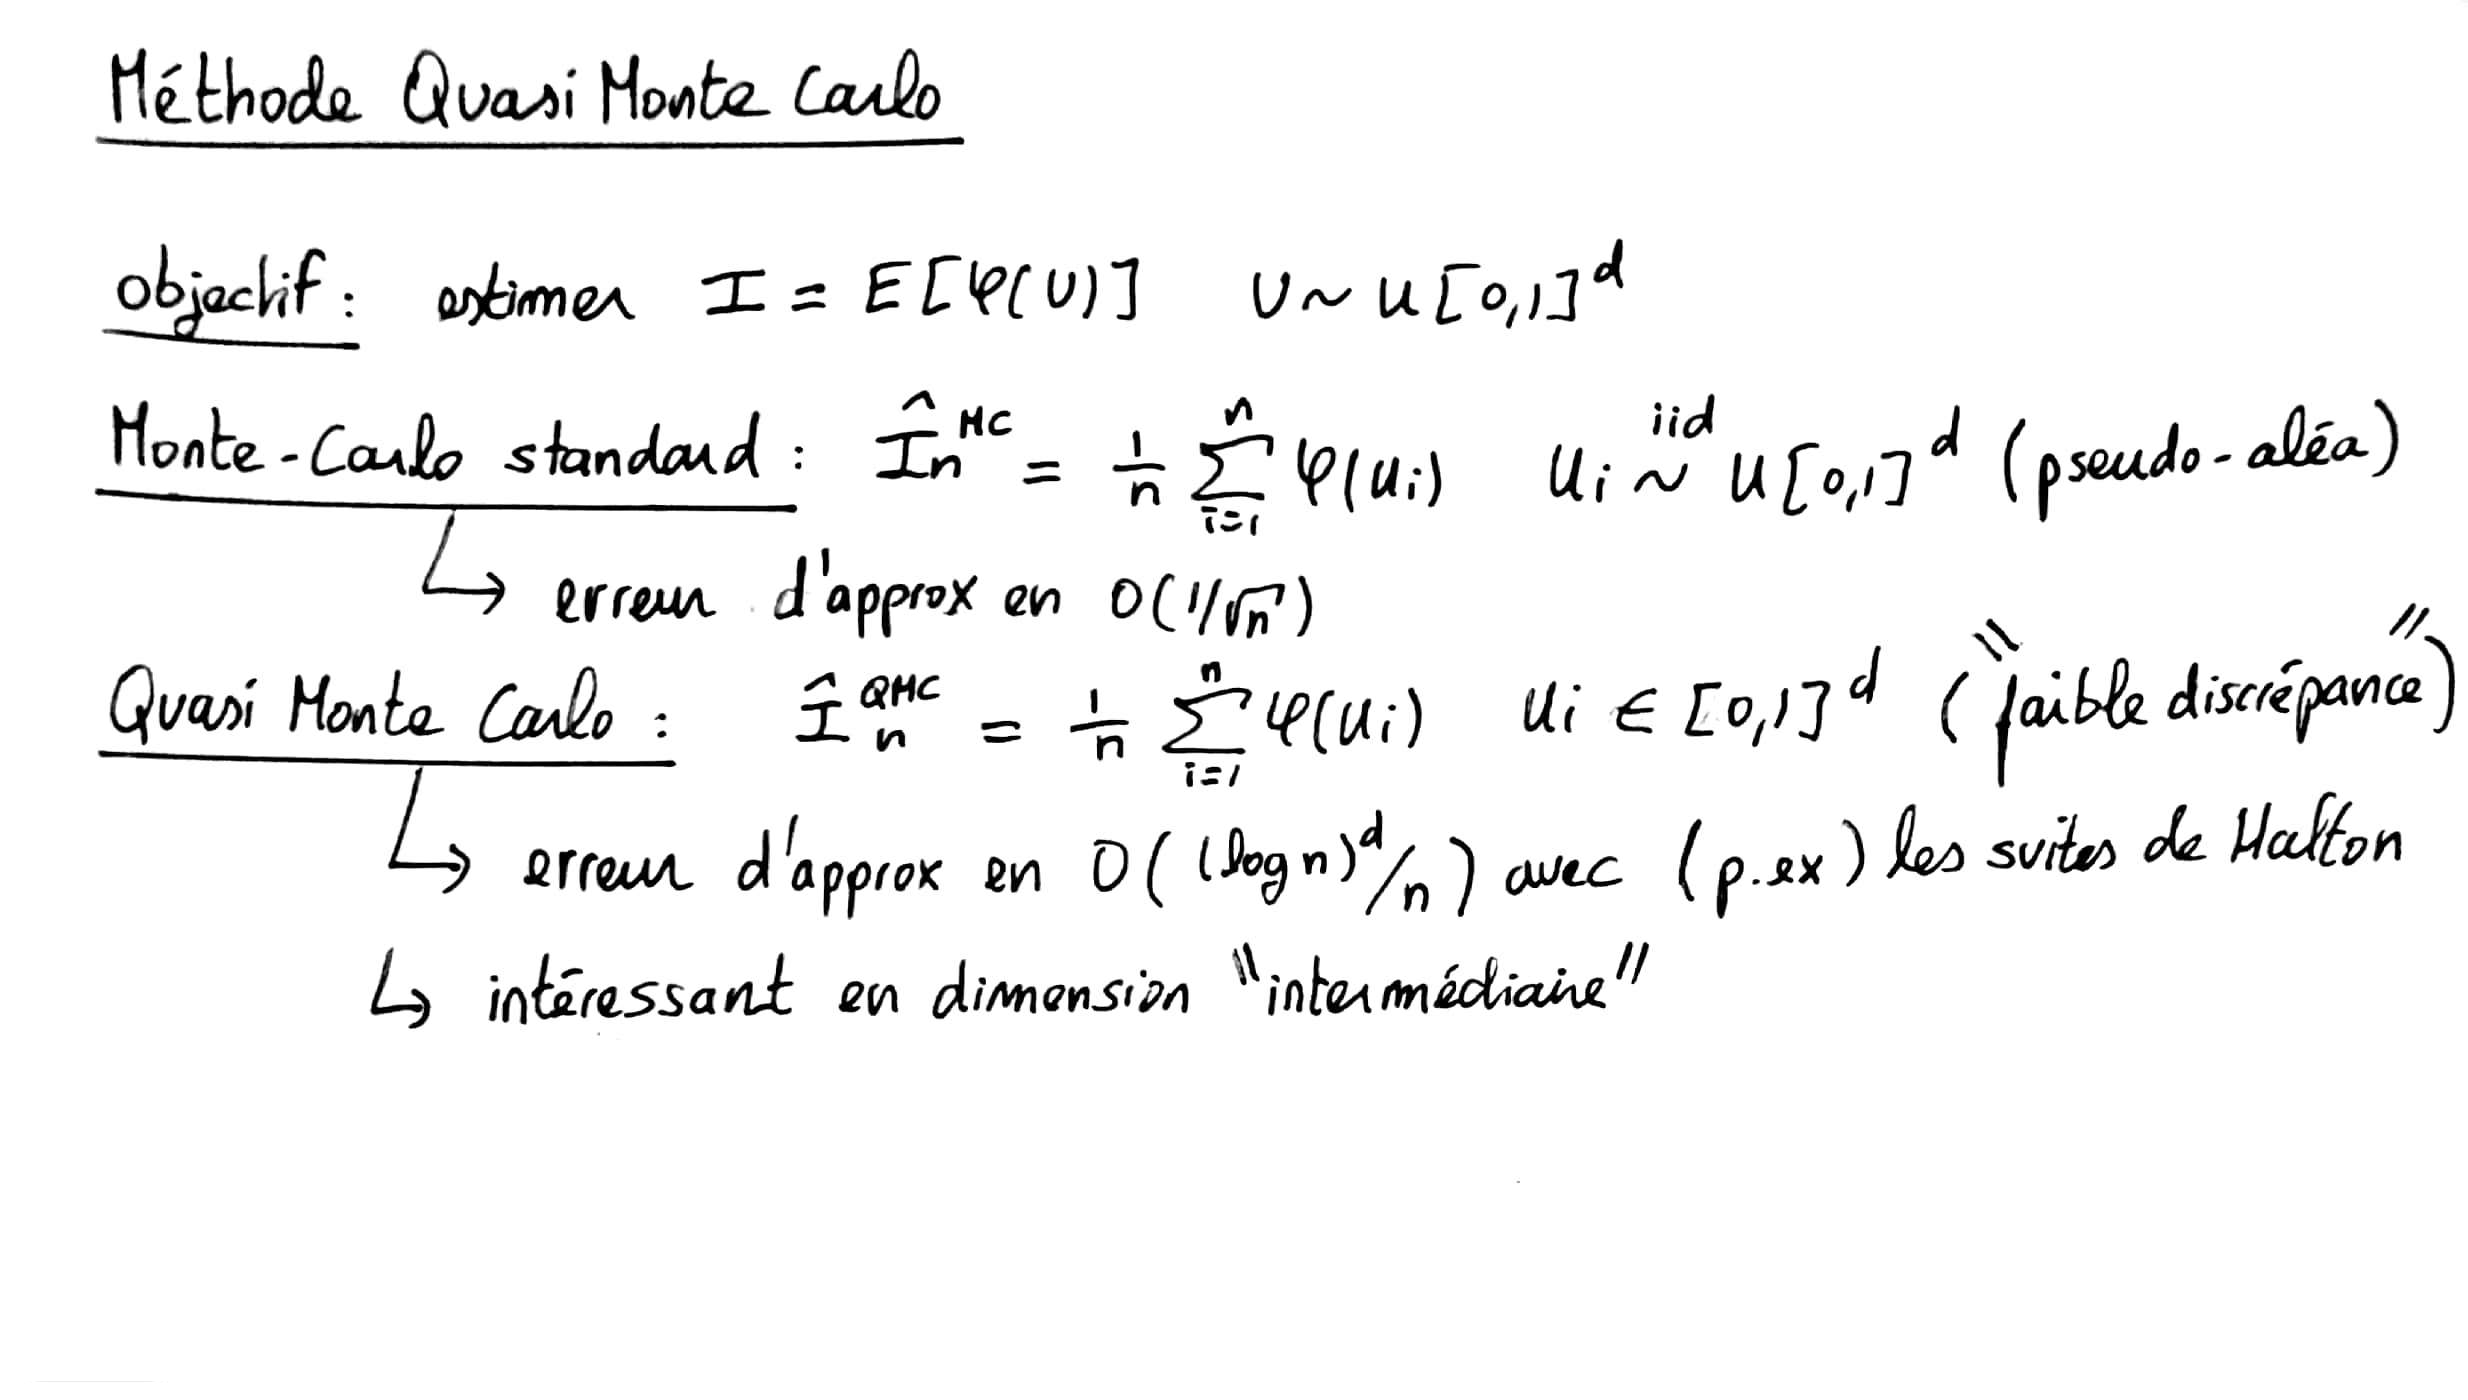

- [suite de Halton](https://en.wikipedia.org/wiki/Halton_sequence) (voir lien wikipédia)

pour $n = 500$

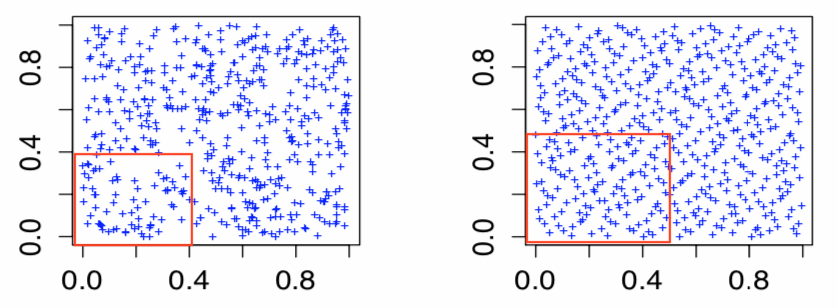

**gauche :** suite loi uniforme ; **droite :** suite de Halton ; **cadrant rouge :** discrépance

**questions :**

- pourquoi ne pas simplement choisir des points complétement déterministe ?
- pour l'approximation des intégrales, pourquoi ne pas utiliser des [méthodes déterministes](https://fr.wikipedia.org/wiki/Calcul_num%C3%A9rique_d%27une_int%C3%A9grale) comme la méthode des rectangles trapèzes, simpson, ...

- une autre suite de faible discrépance (vidéo youtube) : [suite de Sobol](https://www.youtube.com/watch?v=Bx0EyBNJKtA)

Nous allons ici utiliser le package R **randtoolbox** qui permet de générer des suites à faible [discrépance](https://en.wikipedia.org/wiki/Low-discrepancy_sequence) (Sobol, Halton, ...). 

PS : Quelques [libraries en python](https://people.sc.fsu.edu/~jburkardt/py_src/sobol/sobol.html)

Voir le fichier **quasi_monte_carlo.Rmd**

# Bilan du cours Simulation et Monte Carlo

1 **Générer les variables aléatoires classiques :** 
- **but** : générer loi uniforme, loi géométrique, loi normale, loi exponentielle, loi de laplace, ... 
- **exercices :** 1, 2, 3 et 4
- **quelques méthodes :** méthode d'inversion, méthode de rejet, ...

2 **Intégration Monte Carlo :**
- **but** : estimer $I = \mathbb{E}[\varphi(X)]$ grâce aux $X_i \sim^{iid} X$
- **exercices :** 5, 6 (et 9)
- **quelques méthodes :** méthodes de réduction de dimension (control variates, variables antithétiques, Importance Sampling) et Quasi Monte Carlo, ...

3 **Monte Carlo par Chaînes de Markov (MCMC) :**
- **but** : estimer $I = \mathbb{E}[\varphi(X)]$ avec des $X_i$ des chaînes de Markov de loi stationnaire
- **exercice :** 7
- **quelques méthodes :** Gibbs sampling, Metropolis-Hasting sampling, ...

4 **Optimisation avec de l'aléa :** exercice 9